## Split Dataset

In [1]:
import pandas as pd
from underthesea import sent_tokenize
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/stock_full.csv")
df = df.dropna()
df = df.reset_index(drop=True)

df.loc[df["label"]=='positive', 'label'] = 2
df.loc[df["label"]=='neutral', 'label'] = 1
df.loc[df["label"]=='negative', 'label'] = 0

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(df["content"], df["label"], test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
df_train = pd.DataFrame(data = {'content': X_train.values, 'label': y_train.values})
df_dev = pd.DataFrame(data = {'content': X_dev.values, 'label': y_dev.values})
df_test = pd.DataFrame(data = {'content': X_test.values, 'label': y_test.values})

In [5]:
df_train.to_csv('sentiment_analysis/Train.csv', index=False) 
df_dev.to_csv('sentiment_analysis/Dev.csv', index=False) 
df_test.to_csv('sentiment_analysis/Test.csv', index=False) 

## Exploration Data Analysis (EDA)

### Dataset

In [6]:
frequencies = {'Train': df_train["label"].value_counts(), 'Dev': df_dev["label"].value_counts(), 'Test': df_test["label"].value_counts()}
label_frequencies = pd.DataFrame(data=frequencies)
label_frequencies["Dataset"] = label_frequencies["Train"] + label_frequencies["Dev"] + label_frequencies["Test"]
label_frequencies

,Train,Dev,Test,Dataset
label,,,,
0,629,93,86,808
1,658,73,71,802
2,727,86,95,908


In [7]:
import joblib
from vectorizer_tfidf import reviewTfidfVectorizer

vectorizer = reviewTfidfVectorizer()
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

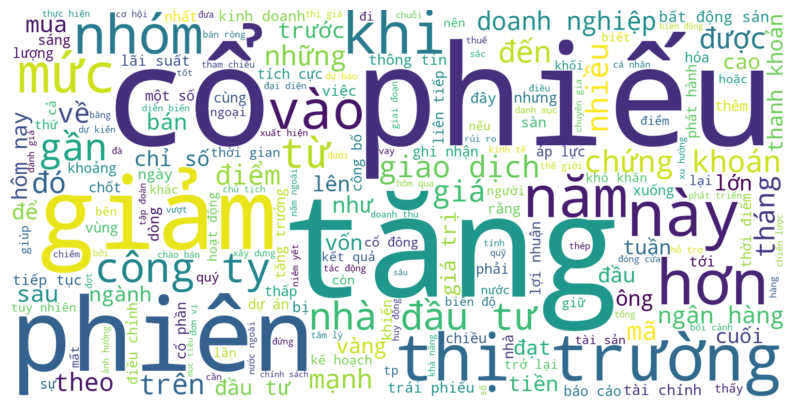

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['trong', 'của', 'và', 'có', 'tại', 'với', 'các', 'là', 'thì']
filtered_frequencies = {word: freq for word, freq in vectorizer.document_counts.items() if word not in custom_stop_words}
wordcloud = WordCloud(background_color='white', width=1600, height=800, max_words=200)
wordcloud.generate_from_frequencies(frequencies=filtered_frequencies)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vectorizer (TF-IDF)

In [9]:
import joblib
from vectorizer_tfidf import reviewTfidfVectorizer

vectorizer = reviewTfidfVectorizer()
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

In [10]:
vocabulary = vectorizer.vocabulary_
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  790


### Word2Vec (Unigram)

In [11]:
from w2v import newsWord2Vec

w2v_skipgram = newsWord2Vec()
w2v_skipgram.load("vec_models/skipgram_model.bin")
w2v_skipgram.most_similar("lợi")

[('hưởng', 0.9709982872009277),
 ('môi trường', 0.948292076587677),
 ('gì', 0.9472187161445618),
 ('sớm', 0.9455041289329529),
 ('cạnh tranh', 0.9426719546318054),
 ('tìm kiếm', 0.9420014023780823),
 ('yêu cầu', 0.9361705183982849),
 ('trung tâm', 0.9361056089401245),
 ('mình', 0.9326722621917725),
 ('tiềm năng', 0.9319918155670166)]

In [12]:
vocabulary = w2v_skipgram.get_vocab()
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  792


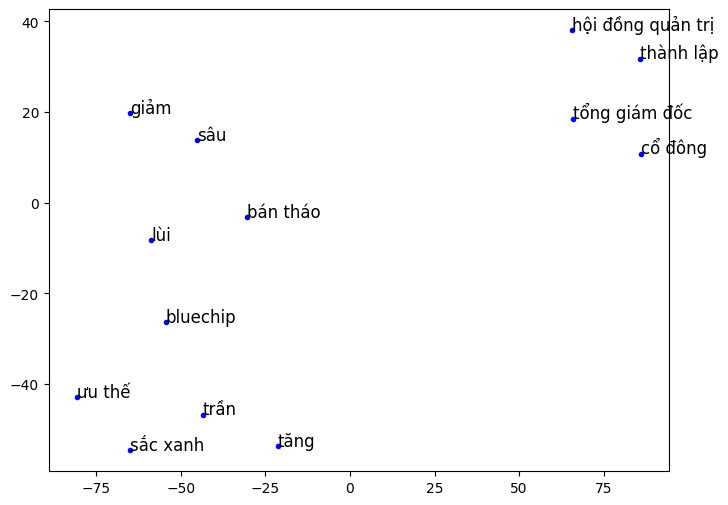

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Chọn các từ bạn muốn vẽ
selected_words = ["tăng", "giảm", "trần", "lùi", 
                  "sâu", "tổng giám đốc", "hội đồng quản trị",
                  "bán tháo", "sắc xanh", "ưu thế",
                  "bluechip", "cổ đông", "thành lập"]

# Lấy vector của các từ từ mô hình
vectors = np.array([w2v_skipgram.get_vector(word) for word in selected_words])

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Hiển thị tên của các từ
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.show()